# 机器学习基础

1. [ML 的 4 个分支](#1.-ML-的-4-个分支)

2. [评估 ML 模型](#2.-评估-ML-模型)

  - [Train, validation and test set](#2.1-Train,-validation-and-test-set)

  - [Things to keep in mind](#2.2-Things-to-keep-in-mind)

3. [数据预处理、特征工程和特征学习](#3.-数据预处理、特征工程和特征学习)

  - [NN 中的数据预处理](#3.1-NN-的数据预处理)
  
  - [特征工程](#3.2-特征工程)

4. [Overfitting and underfitting]()

## 1. ML 的 4 个分支

- <font color='blue'>Supervised learning</font>

  - regression
  
  - classification
  
  - <font color='crimson'>sequence generation (序列生成)</font>: 给定一张图片，预测描述图片的文字。有时可以被重新表示为一系列分类问题，比如反复预测序列中的单词或标记。
  
  - <font color='crimson'>syntax tree prediction (语法树预测)</font>: 给定一个句子，预测其分解生成的语法树。
  
  - <font color='crimson'>object detection (目标检测)</font>: 给定一张图片，在图中特定目标的周围画一个边界框。也可以表示为分类问题 (给定多个候选边界框，对每个框内的目标进行分类) 或分类与回归联合问题 (用向量回归来预测边界框的坐标)。
  
  - <font color='crimson'>image segmentation (图像分割)</font>: 给定一张图像，在特定物体上画一个像素级的掩模 (mask).


- <font color='blue'>Unsupervised learning</font>
 
  - dimensionality reduction
  
  - clustering

  For: data visualization, data compression, data denoising, or to better understand the correlations present in the data at hand.
  
  是数据分析的必备技能，在解决 supervised learning 问题之前，为了更好地了解数据集，它通常是一个必要步骤。


- <font color='blue'>Self-supervised learning</font>

  Self-supervised learning is **supervised learning without human-annotated labels**—you can think of it as supervised learning without any humans in the loop.
  
  **There are still labels involved** (because the learning has to be supervised by something), but they’re **generated from the input data, typically using a heuristic algorithm**.

  **Autoencoders** are a well-known instance of self-supervised learning, where the generated targets are the input, unmodified.
  
  给定视频中过去的帧来预测下一帧，或者给定文本中前面的词来预测下一个词，都是自监督学习的例子。这两个例子也属于<font color='crimson'>时序监督学习 (temporally supervised learning)</font>，即用未来的输入数据作为监督。


- <font color='blue'>Reinforcement learning</font>

  In reinforcement learning, an agent receives information about its environment and learns to choose actions that will maximize some reward.

<div class="alert alert-block alert-info">
    <center><b>Batch size</b></center><br>
    <b>The number of samples is often a power of 2 (typically between 8 and 128), to facilitate memory allocation on GPU.</b><br><br>
    When training, a mini-batch is used to compute a single gradient-descent update applied to the weights of the model.
    
</div>

## 2. 评估 ML 模型

<font color='blue'>ML 的目的是得到可以泛化 (generalize) 的模型，即在前所未见的数据上表现很好的模型，而过拟合则是核心难点。你只能控制可以观察的事情，所以能够可靠地衡量模型的泛化能力非常重要。</font>

### 2.1 Train, validation and test set

<font color='crimson'>评估模型的重点是将数据划分为三个集合: train set、val set 和 test set。 原因在于开发模型时总是需要调节模型配置</font>，比如选择层数或每层大小 (这叫作模型的**超参数 (hyperparameter)**，以便与**模型参数** (即权重) 区分开)。这个调节过程需要使用模型在 val set 上的性能作为反馈信号。这个<font color='crimson'>调节参数的过程本质上就是一种学习: 在某个参数空间中寻找良好的模型配置</font>。因此，<font color='crimson'>如果基于模型在 val 的性能来调节模型配置，会很快导致模型在 val set 上过拟合</font>，即使你并没有在 val set 上直接训练模型也会如此。

造成这一现象的关键在于**<font color='blue'>信息泄露 (information leak)</font>**。 <font color='crimson'>每次基于模型在 val 上的性能来调节模型超参数，都会有一些关于验证数据的信息泄露到模型中</font>。如果对每个参数只调节一次，那么泄露的信息很少，val set 仍然可以可靠地评估模型。但如果你多次重复这一过程 (运行一次实验，在 val set 上评估，然后据此修改模型)，那么将会有越来越多的关于 val set 的信息泄露到模型中。

最后，你得到的模型在 val set 上的性能非常好 (人为造成的)，因为这正是你优化的目的。你关心的是模型在全新数据上的性能，而不是在 val set 上的性能，因此你需要使用一个完全不同的、前所未见的数据集来评估模型，它就是 test set。你的模型一定不能读取与 test set 有关 的任何信息，既使间接读取也不行。如果基于 test set 性能来调节模型，那么对泛化能力的衡量是不准确的。

将数据划分为训练集、验证集和测试集可能看起来很简单，但如果可用数据很少，还有几种高级方法可以派上用场。<font color='blue'>有三种经典的评估方法:</font>

1. 简单的留出验证
2. K 折验证
3. 带有打乱数据的重复 K 折验证。

<br>

- **<font color='blueviolet' size=5>Way 1: Simple hold-out validation</font>**


```python
num_val_samples = 1000

# Shuffling the data is usually appropriate
np.random.shuffle(data)

# Define the validation data
val_data = data[:num_val_samples]
# Define the training data
data = data[num_val_samples:]
training_data = data[:]

# Train a model on the training data
model = build_model()
model.fit(training_data)
# Evaluate the model on the validation data
val_score = model.evaluate(val_data)

# Tune the model
# ...

# Once you've tuned the hyperparameters, it's common to train the final model
# from scratch on ALL non-test data available.
model = build_model()
model.fit(np.concatenate([training_data, val_data]))
test_score = model.evaluate(test_data)
```

<font color='crimson'>如果可用的数据很少，那么可能 val set 和 test set 包含的样本就太少，从而无法在统计学上代表数据。这个问题很容易发现：如果在划分数据前进行不同的随机打乱，最终得到的模型性能差别很大，那么就存在这个问题。</font>

K-fold validation and iterated K-fold validation 是这一问题的两种方法。

<br>

- **<font color='blueviolet' size=5>Way 2: K-fold validation</font>**

![k-fold cv](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

将数据划分为大小相同的 K 个分区。对于每个分区 i，在剩余的 K-1 个分区上训练模型，然后在分区 i 上评估模型。最终分数等于 K 个分数的平均值。

对于不同的训练集 - 测试集划分，如果模型性能的变化很大，那么这种方法很有用。

```python
# 1: Implement k-fold validation by hand
k = 5
num_val_samples = len(data) // k

np.random.shuffle(data)

val_scores = []
for fold in range(k):
    # Selects the validation data partition
    val_data = data[num_val_samples * fold:num_val_samples * (fold + 1)]
    # Uses the remainder of the data as training data
    training_data = np.concatenate([data[:num_val_samples * fold],
                                    data[num_val_samples * (fold + 1)]])

    # Creates a brand-new instance of the model (untrained)
    model = build_model()
    model.fit(training_data)
    val_score = model.evaluate(val_data)
    val_scores.append(val_score)

# Validation score: average of the validation scores of the k folds
val_score = np.mean(val_scores)

# Trains the final model on ALL non-test data available
model = build_model()
model.fit(data)
test_score = model.evaluate(test_data)

# -------------------------------------------------------

# 2: Implement k-fold validation by Scikit-Learn
from sklearn.model_selection import KFold

k = 5
val_scores = []
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, val_index in kf.split(data):
    training_data = data[train_index]
    val_data = data[val_index]

    # Creates a brand-new instance of the model (untrained)
    model = build_model()
    model.fit(training_data)
    val_score = model.evaluate(val_data)
    val_scores.append(val_score)

# Validation score: average of the validation scores of the k folds
val_score = np.mean(val_scores)

# Trains the final model on ALL non-test data available
model = build_model()
model.fit(data)
test_score = model.evaluate(test_data)
```

<br>

- **<font color='blueviolet' size=5>Way 3: Iterated K-fold validation with shuffling</font>**

如果可用的数据相对较少，而又需要尽可能精确地评估模型，那么可以选择该方法。这种方法在 kaggle 竞赛中特别有用。

具体做法是多次使用 K 折验证，在每次将数据划分为 K 个分区之前都先将数据打乱。最终分数是每次 K 折验证分数的平均值。注意，这种方法一共要训练和评估 P×K 个模型(P 是重复次数)，计算代价很大。

In [1]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

In [2]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])

repeated_kf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=42)
# Generates indices to split data into training and test set.
for train_idx, test_idx in repeated_kf.split(X):
    print("train index: {}, test index: {}".format(train_idx, test_idx))

train index: [0 2], test index: [1 3]
train index: [1 3], test index: [0 2]
train index: [0 2], test index: [1 3]
train index: [1 3], test index: [0 2]
train index: [1 2], test index: [0 3]
train index: [0 3], test index: [1 2]


### 2.2 Things to keep in mind

- **<font color='crimson'>数据代表性 (data representativeness)</font>**

  训练集和测试集都能够代表当前数据。在将数据划分为训练集和测试集之前，通常应该随机打乱数据。


- **<font color='crimson'>时间箭头 (the arrow of time)</font>**

  如果<font color='crimson'>想要根据过去预测未来</font> (比如明天的天气、股票走势等)，那么<font color='crimson'>在划分数据前你不应该随机打乱数据，因为这么做会造成时间泄露 (temporal leak): 你的模型将在未来数据上得到有效训练</font>。在这种情况下，你应该始终确保测试集中所有数据的时间都晚于训练集数据。


- **<font color='crimson'>数据冗余 (redundancy in your data)</font>**

  如果数据中的某些数据点出现了两次 (现实中常见)，那么打乱数据并划分成训练集和验证集会导致训练集和验证集之 间的数据冗余。从效果上来看，你是在部分训练数据上评估模型，这是极其糟糕的！<font color='crimson'>一定要确保训练集和验证集之间没有交集。</font>

## 3. 数据预处理、特征工程和特征学习



### 3.1 NN 的数据预处理

<font color='crimson'>数据预处理的目的是使原始数据更适于用神经网络处理，包括向量化、标准化、处理缺失值和特征提取。</font>

**<font color='green' size=3>1. Vectorization</font>**

<font color='crimson'>神经网络的所有输入和目标都必须是浮点数张量 (在特定情况下可以是整数张量)</font>。无论处理什么数据 (声音、图像还是文本)，都必须首先将其转换为张量，这一步叫作**<font color='blue'>数据向量化 (data vectorization)</font>**。


**<font color='green' size=3>2. Value normalization</font>**

一般来说，将取值相对较大的数据（比 NN 初始权重大很多）或异质数据（heterogeneous data，一个特征在 0-1 内，另一个特征在 100-200 内）输入到 NN 中是不安全的。这么做可能导致较大的梯度更新，进而导致 NN 无法收敛。<font color='crimson'>为了让 NN 的学习更加容易，输入数据应该具有以下特征</font>：

  - **取值较小**：大部分值都应该在 0-1 内。
  
  - **同质性（homogenous）**：所有特征的取值都应该在大致相同的范围内。
  

这种更严格的标准化方法也很常见，而且很有用，虽然不一定总是必需的。

  - Normalize each feature independently to have a mean of 0.
  
  - Normalize each feature independently to have a standard deviation of 1.

```python
# Normalization
x -= x.mean(axis=0)
x /= x.std(axis=0)
```

**<font color='green' size=3>3. Handle missing values</font>**

**<font color='crimson'>一般来说，对于 NN，将缺失值设置为 0 是安全的，只要 0 不是一个有意义的值。NN 能够从数据中学到 0 意味着缺失数据，并且会忽略这个值。</font>**


<div class="alert alert-block alert-info">

<b>如果测试数据中可能有缺失值，而 NN 是在没有缺失值的数据上训练的，那么 NN 不可能学会忽略缺失值。此时，应该人为生成一些有缺失项的训练样本：多次复制一些训练样本，然后删除测试数据中可能缺失的某些特征。</b>
</div>

### 3.2 特征工程

**<font color='blue'>特征工程 (feature engineering)</font>** 是指将数据输入到模型之前，利用自己有关数据和 ML 算法（NN）的知识来对数据进行硬编码（非模型学到的），以改善模型的效果。

<div class="alert alert-block alert-info">

<b>多数情况下，一个 ML 模型无法从完全任意的数据中进行学习。呈现给模型的数据应该便于模型进行学习。</b><br><br>
<b>特征工程的本质：用更简单的方式表述问题，从而使问题变得更容易。这通常需要深入理解问题。</b>

</div>

经典的浅层算法（传统的 ML 算法）没有足够大的假设空间来自己学习有用的表示。将数据呈现给算法的方式对解决问题至关重要。对于现代 ML，大部分特征工程都是不需要的，因为 NN 能够从原始数据中自动提取有用的特征。但这并不意味着不需要特征工程了。

<font color='crimson'>DL 也需要特征工程的原因：</font>

- 良好的特征仍然可以让你用更少的资源更优雅地解决问题。

- 良好的特征可以让你用更少的数据解决问题。DL 模型自主学习特征的能力依赖于大量的训练数据。如果只有很少的样本，那么特征的信息价值就变得非常重要。

## 4. Overfitting and underfitting

**ML 的根本问题是优化和泛化之间的对立。**

- **<font color='blue'>优化 (optimization)</font>** 是指调节模型以在训练数据上得到最佳性能（即 ML 中的学习）。


- **<font color='blue'>泛化 (generalization)</font>** 是指训练好的模型在前所未见的数据上的性能好坏。


<font color='crimson'>ML 的目的是得到良好的泛化，但你无法控制泛化，只能基于训练数据调节模型。</font>


训练开始时，优化和泛化是相关的：训练数据上的损失越小，测试数据上的损失也越小。这时的模型 underfitting，即仍有改进的空间，NN 还没有对训练数据中所有相关模式建模。但在训练数据上迭代一定次数之后，泛化不再提高，验证指标先是不变，然后开始变差，即模型开始 overfitting。这时模型开始学习仅和训练数据有关的模式，但这种模式对新数据来说是错误的或无关紧要的。


**<font color='crimson'>为了防止 overfitting，最优解决方法是获取更多的训练数据。</font>**模型的训练数据越多，泛化能力自然也越好。

如果无法获取更多数据，**<font color='crimson'>次优解决方法是调节模型允许存储的信息量，或对模型允许存储的信息加以约束</font>**。如果一个 NN 只能记住几个模式，那么优化过程会迫使模型集中学习最重要的模式，这样更可能得到良好的泛化。这种降低过拟合的方法叫作**<font color='blue'>正则化 (regularization)</font>**。

以下介绍几种常见的正则化方法。

### 4.1 减小模型大小 (Reduce the NN's size)

**<font color='crimson'>防止 overfitting 最简单的方法就是减小模型大小，即减小模型中可学习参数的个数 (由层数和每层单元数决定)。</font>**

DL 中，模型中可学习参数的个数通常被称为**<font color='blue'>模型容量 (capacity)</font>** 。直观上来看，参数更多的模型拥有更大的记忆容量(memorization capacity)，因此能够在训练样本和目标之间轻松地学会完美的字典式映射，这种映射没有任何泛化能力。与此相反，如果网络的记忆资源有限，则无法轻松学会这种映射。

因此，<font color='crimson'>为了让损失最小化，NN 必须学会对目标具有很强预测能力的压缩表示，这也正是我们感兴趣的数据表示。</font>同时请记住，你<font color='crimson'>使用的模型应该具有足够多的参数，以防欠拟合</font>，即模型应避免记忆资源不足。在容量过大与容量不足之间要找到一个 trade-off。


<div class="alert alert-block alert-info">
    <center><b><font color='blue' size=3>怎么确定 NN 架构？</font></b></center>

<b>没有具体的方法能够确定最佳层数或每层的最佳大小。</b>必须在验证集上评估一系列不同的网络架构以便为数据找到最佳的模型大小。

<b>要找到合适的模型大小，一般的工作流程是开始时选择相对较少的层和参数，然后逐渐增加层的大小或增加新层，直到这种增加对验证损失的影响变得很小。</b>

</div>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Load the IMDB data
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
train_data.shape, test_data.shape

((25000,), (25000,))

In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [7]:
# Vectorization
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros(shape=(len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [10]:
# The original model
original_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])
original_history = original_model.fit(x_train,
                                      y_train,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 110us/sample - loss: 0.4526 - acc: 0.8164 - val_loss: 0.3625 - val_acc: 0.8563
Epoch 2/20
25000/25000 [==============================] - 2s 89us/sample - loss: 0.2608 - acc: 0.9089 - val_loss: 0.2900 - val_acc: 0.8849
Epoch 3/20
25000/25000 [==============================] - 2s 88us/sample - loss: 0.2003 - acc: 0.9303 - val_loss: 0.2810 - val_acc: 0.8880
Epoch 4/20
25000/25000 [==============================] - 2s 86us/sample - loss: 0.1708 - acc: 0.9388 - val_loss: 0.3027 - val_acc: 0.8804
Epoch 5/20
25000/25000 [==============================] - 2s 86us/sample - loss: 0.1437 - acc: 0.9491 - val_loss: 0.3445 - val_acc: 0.8682
Epoch 6/20
25000/25000 [==============================] - 2s 90us/sample - loss: 0.1240 - acc: 0.9564 - val_loss: 0.3361 - val_acc: 0.8752
Epoch 7/20
25000/25000 [==============================] - 2s 88us/sample - loss: 0.1103 - acc: 0.9624 - val_loss: 0

In [11]:
# A smaller model
tf.keras.backend.clear_session()
smaller_model = tf.keras.models.Sequential()
smaller_model.add(tf.keras.layers.Dense(4, activation='relu', input_shape=(10000, )))
smaller_model.add(tf.keras.layers.Dense(4, activation='relu'))
smaller_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])
smaller_history = smaller_model.fit(x_train,
                                    y_train,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 94us/sample - loss: 0.5024 - acc: 0.7996 - val_loss: 0.4036 - val_acc: 0.8590
Epoch 2/20
25000/25000 [==============================] - 2s 74us/sample - loss: 0.3182 - acc: 0.8986 - val_loss: 0.3174 - val_acc: 0.8834
Epoch 3/20
25000/25000 [==============================] - 2s 74us/sample - loss: 0.2456 - acc: 0.9193 - val_loss: 0.2880 - val_acc: 0.8890
Epoch 4/20
25000/25000 [==============================] - 2s 74us/sample - loss: 0.2059 - acc: 0.9300 - val_loss: 0.2855 - val_acc: 0.8853
Epoch 5/20
25000/25000 [==============================] - 2s 75us/sample - loss: 0.1790 - acc: 0.9387 - val_loss: 0.2981 - val_acc: 0.8792
Epoch 6/20
25000/25000 [==============================] - 2s 76us/sample - loss: 0.1598 - acc: 0.9443 - val_loss: 0.2961 - val_acc: 0.8829
Epoch 7/20
25000/25000 [==============================] - 2s 76us/sample - loss: 0.1446 - acc: 0.9518 - val_loss: 0.

In [12]:
# Compare the two models on val loss
def compare_model(history_1, history_2, label_1, label_2, epochs=range(1, 21)):
    val_loss_1 = history_1.history['val_loss']
    val_loss_2 = history_2.history['val_loss']

    plt.figure(figsize=(6.6, 4.2))
    plt.plot(epochs, val_loss_1, 'b+-', label=label_1)
    plt.plot(epochs, val_loss_2, 'g.-', label=label_2)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Val loss', fontsize=16)
    plt.legend(fontsize=18)
    plt.show()

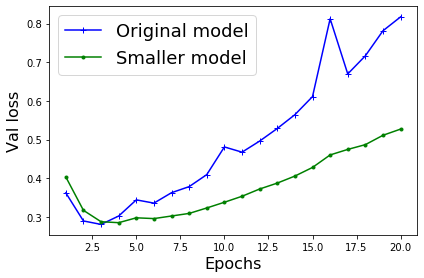

In [13]:
# Original model v.s. smaller model
compare_model(original_history, smaller_history, 'Original model', 'Smaller model')

<font color='crimson'>更小的 NN 开始 overfitting 的时间要晚于原始 NN，而且开始 overfitting 之后，它的性能变差的速度也更慢。</font>

In [14]:
# A bigger model
tf.keras.backend.clear_session()
bigger = tf.keras.models.Sequential()
bigger.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(10000, )))
bigger.add(tf.keras.layers.Dense(128, activation='relu'))
bigger.add(tf.keras.layers.Dense(1, activation='sigmoid'))

bigger.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])
bigger_history = bigger.fit(x_train,
                             y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test),
                             verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4352 - acc: 0.8012 - val_loss: 0.3783 - val_acc: 0.8402
Epoch 2/20
25000/25000 - 3s - loss: 0.2331 - acc: 0.9081 - val_loss: 0.3099 - val_acc: 0.8715
Epoch 3/20
25000/25000 - 3s - loss: 0.1693 - acc: 0.9352 - val_loss: 0.2953 - val_acc: 0.8840
Epoch 4/20
25000/25000 - 3s - loss: 0.1169 - acc: 0.9557 - val_loss: 0.3548 - val_acc: 0.8676
Epoch 5/20
25000/25000 - 2s - loss: 0.0803 - acc: 0.9723 - val_loss: 0.3741 - val_acc: 0.8760
Epoch 6/20
25000/25000 - 3s - loss: 0.0486 - acc: 0.9854 - val_loss: 0.4671 - val_acc: 0.8752
Epoch 7/20
25000/25000 - 3s - loss: 0.0348 - acc: 0.9894 - val_loss: 0.5300 - val_acc: 0.8749
Epoch 8/20
25000/25000 - 3s - loss: 0.0288 - acc: 0.9928 - val_loss: 0.5900 - val_acc: 0.8728
Epoch 9/20
25000/25000 - 3s - loss: 0.0204 - acc: 0.9940 - val_loss: 0.6395 - val_acc: 0.8717
Epoch 10/20
25000/25000 - 2s - loss: 0.0297 - acc: 0.9934 - val_loss: 0.6104 - val_acc: 0.8692
Epoch 11/

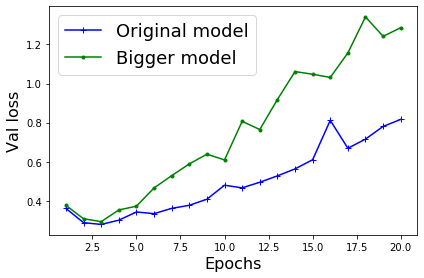

In [15]:
# Original model v.s. bigger model
compare_model(original_history, bigger_history, 'Original model', 'Bigger model')

<font color='crimson'>更大的 NN 过拟合更严重，其验证损失的波动也更大。</font>

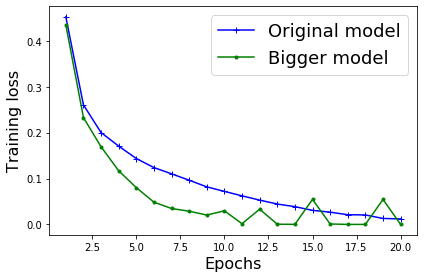

In [16]:
# Compare the two models on training loss
def compare_model_training(history_1, history_2, label_1, label_2, epochs=range(1, 21)):
    val_loss_1 = history_1.history['loss']
    val_loss_2 = history_2.history['loss']

    plt.figure(figsize=(6.6, 4.2))
    plt.plot(epochs, val_loss_1, 'b+-', label=label_1)
    plt.plot(epochs, val_loss_2, 'g.-', label=label_2)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Training loss', fontsize=16)
    plt.legend(fontsize=18)
    plt.show()


compare_model_training(original_history, bigger_history,
                       'Original model', 'Bigger model')

<font color='crimson'>NN 的容量越大，拟合训练数据 (即得到很小的训练损失) 的速度就越快，但也更容易过拟合 (导致训练损失和验证损失有很大差异)。</font>

### 4.2 权重正则化 (weight regularization)

**<font color='blue'>奥卡姆剃刀(Occam’s razor)</font>** 给定一些训练数据和一种网络架构，很多组权重值 (即很多模型) 都可以解释这些数据。简单模型比复杂模型更不容易过拟合。

**<font color='blue'>简单模型 (simple model)</font>** 是指参数值分布的熵更小的模型 (或参数更少的模型)。

因此，**<font color='crimson'>一种常见的降低过拟合的方法就是强制让模型权重只能取较小的值，从而限制模型的复杂度，这使得权重值的分布更加规则 (regular)</font>**。这种方法叫作**<font color='blue'>权重正则化 (weight regularization)</font>**，其实现方法是向网络损失函数中添加与较大权重值相关的成本(cost)。

**权重正则化有 2 中形式：**

- **<font color='blue'>L1 regularization</font>**, where the cost added is proportional to the absolute value of the weights coefficients


- **<font color='blue'>L2 regularization</font>**, where the cost added is proportional to the square of the value of the weights coefficients. 

<font color='crimson'>L2 regularization 在 NN 中也称之为权重衰减 (weight decay).</font>

In [17]:
# A model with L2 weight regularization
tf.keras.backend.clear_session()

l2_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,
                          kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          activation='relu', input_shape=(10000, )),
    tf.keras.layers.Dense(16,
                          kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])
l2_history = l2_model.fit(x_train,
                          y_train,
                          epochs=20,
                          batch_size=512,
                          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 110us/sample - loss: 0.4887 - acc: 0.8140 - val_loss: 0.3913 - val_acc: 0.8616
Epoch 2/20
25000/25000 [==============================] - 2s 89us/sample - loss: 0.3099 - acc: 0.9037 - val_loss: 0.3360 - val_acc: 0.8844
Epoch 3/20
25000/25000 [==============================] - 2s 88us/sample - loss: 0.2627 - acc: 0.9227 - val_loss: 0.3318 - val_acc: 0.8863
Epoch 4/20
25000/25000 [==============================] - 2s 86us/sample - loss: 0.2454 - acc: 0.9274 - val_loss: 0.3438 - val_acc: 0.8816
Epoch 5/20
25000/25000 [==============================] - 2s 87us/sample - loss: 0.2287 - acc: 0.9356 - val_loss: 0.3911 - val_acc: 0.8646
Epoch 6/20
25000/25000 [==============================] - 2s 88us/sample - loss: 0.2184 - acc: 0.9386 - val_loss: 0.3514 - val_acc: 0.8807
Epoch 7/20
25000/25000 [==============================] - 2s 89us/sample - loss: 0.2138 - acc: 0.9418 - val_loss: 0

**<font color='crimson'>`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.</font>**

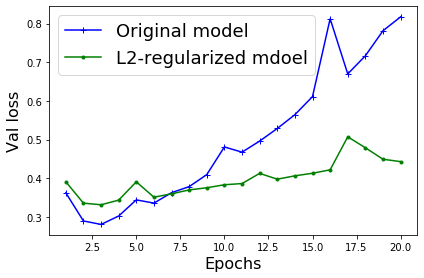

In [18]:
# Original model v.s. L2 weight regularized model
compare_model(original_history, l2_history, 'Original model', 'L2-regularized mdoel')

<font color='crimson'>虽然 2 个模型的参数相同，但具有 L2 正则化的模型比原始模型更不容易过拟合。</font>

In [19]:
# L1 regularization
tf.keras.regularizers.l1(0.001)

# L1 and L2 regularization at the same time
tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)

### 3. Dropout

**<font color='crimson'>Dropout 是 NN 中最有效、最常用的正则化方法之一。</font>**

<font color='crimson'>对某一层使用 dropout，就是在训练过程中随机将该层的一些输出特征舍弃 (设置为 0)。</font>假设在训练过程中，某一层对给定输入样本的返回值应该是向量 `[0.2, 0.5, 1.3, 0.8, 1.1]`。使用 dropout 后，这个向量会有几个随机的元素变成 0，比如 `[0, 0.5, 1.3, 0, 1.1]`。

**<font color='crimson'>dropout 比率 (dropout rate) 是被设为 0 的特征所占的比例，通常在 0.2~0.5 范围内。测试时没有单元被舍弃，而该层的输出值需要按 dropout 比率缩小，因为这时比训练时有更多的单元被激活，需要加以平衡。</font>**

```python
# 假设输出层 layer_output 的 shape 为 (batch_size, features)

# At training time: drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)

# At test time: scale the output down by the dropout rate
layer_output *= 0.5  # dropout_rate=0.5
```

在实现过程中，让 2 个运算都在训练时进行，而测试时保持输出不变。
```python
# At training time:
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5  # here, 0.5 is (1-dropout_rate)
```

**<font color='crimson'>core idea 是在层的输出值中引入噪声，打破不显著的偶然模式。如果没有噪声的话，NN 将会记住这些偶然模式。</font>**

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant (what Hinton refers to as "conspiracies"), which the network would start memorizing if no noise was present.

<div class="alert alert-block alert-info">
    <b>dropout 将被应用于前一层的输出。</b><br><br>
    <b>Dropout layer gets applied to the output of layer right before it.</b>
    

</div>

In [20]:
# A model with dropout
tf.keras.backend.clear_session()

dpt_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000, )),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])
dpt_history = dpt_model.fit(x_train,
                          y_train,
                          epochs=20,
                          batch_size=512,
                          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 110us/sample - loss: 0.5900 - acc: 0.6888 - val_loss: 0.4311 - val_acc: 0.8674
Epoch 2/20
25000/25000 [==============================] - 2s 87us/sample - loss: 0.4360 - acc: 0.8181 - val_loss: 0.3338 - val_acc: 0.8841
Epoch 3/20
25000/25000 [==============================] - 2s 88us/sample - loss: 0.3546 - acc: 0.8698 - val_loss: 0.2898 - val_acc: 0.8890
Epoch 4/20
25000/25000 [==============================] - 2s 89us/sample - loss: 0.3039 - acc: 0.8932 - val_loss: 0.2781 - val_acc: 0.8882
Epoch 5/20
25000/25000 [==============================] - 2s 88us/sample - loss: 0.2622 - acc: 0.9136 - val_loss: 0.2882 - val_acc: 0.8814
Epoch 6/20
25000/25000 [==============================] - 2s 88us/sample - loss: 0.2335 - acc: 0.9238 - val_loss: 0.2877 - val_acc: 0.8870
Epoch 7/20
25000/25000 [==============================] - 2s 89us/sample - loss: 0.2083 - acc: 0.9323 - val_loss: 0

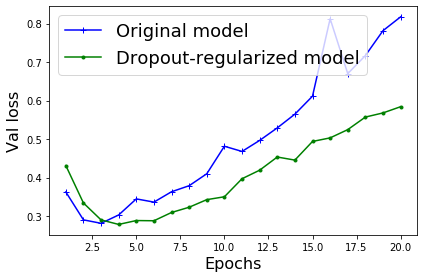

In [21]:
# Original model v.s. Dropout regularized model
compare_model(original_history, dpt_history, 'Original model', 'Dropout-regularized model')

<font color='crimson'>Dropout 有助于性能提升。</font>

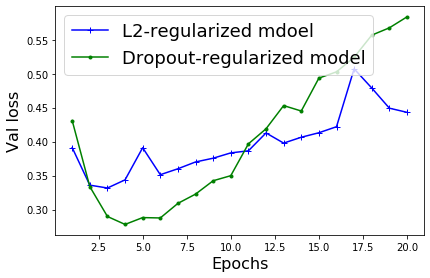

In [22]:
# L2 weight regularized model v.s. Dropout regularized model
compare_model(l2_history, dpt_history, 'L2-regularized mdoel', 'Dropout-regularized model')

## 5. ML 的通用工作流程

A universal blueprint that you can use to attack and solve any machine-learning problem.

**<font color='green' size=3>1. 定义问题，收集数据</font>**

- 输入是什么？预测什么？只有拥有数据，才能预测某件事情。

- 问题的类型是什么？二分类？多分类？回归？。。。监督？。。确定问题类型有助于选择模型架构、损失函数等。

在这一阶段，所做的假设：

- **<font color='crimson'>假设输出是可以根据输入进行预测的。</font>**


- **<font color='crimson'>假设可用的数据包含足够多的信息，足以学习输入和输出之间的关系。</font>**

<font color='crimson'>在开发出工作模型之前，这些只是假设，等待验证真假。并非所有问题都可以解决。</font>你收集了包含输入 X 和目标 Y 的很多样例，并不意味着 X 包含足够多的信息来预测 Y。

> 例如，如果你想根据某支股票最近的历史价格来预测其股价走势，那你成功的可能性不大，因为历史价格并没有包含很多可用于预测的信息。